In [1]:
!pip install selenium

  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/3f/fd/c2e7bb547b5b96c7bd536b4a80c4564b7ce5cd38d10095fbba8648996ab9/selenium-4.18.1-py3-none-any.whl.metadata
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/14/fb/9299cf74953f473a15accfdbe2c15218e766bae8c796f2567c83bae03e98/trio-0.24.0-py3-none-any.whl.metadata
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/48/be/a9ae5f50cad5b6f85bd2574c2c923730098530096e170c1ce7452394d7aa/trio_websocket-0.11.1-py3-none-any.whl.metadata
  Obtaining dependency information for typing_extensions>=4.9.0 from https://files.pythonhosted.org/packages/f9/de/dc04a3ea60b22624b51c703a84bbe0184abcd1d0b9bc8074b5d6b7ab90bb/typing_extensions-4.10.0-py3-none-any.whl.metadata
  Obtaining dependency information for attrs>=20.1.0 from https://files.pythonhosted.org/packages/e0/44/827b2a91a5816512fcaf3cc4ebc465ccd5d598c45cefa670


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from selenium import webdriver

In [3]:
driver = webdriver.Chrome()

In [4]:
driver.get('https://www.naver.com')

In [5]:
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys


- find_element()
    - 조건에 맞는 첫 번째 태그를 선택
    - bs4에 있는 find() 흡사
- find_elements()
    - 조건에 맞는 모든 태그를 선택
    - bs4에 있는 find_all과 흡사

In [6]:
len(driver.find_elements(By.CLASS_NAME, 'shortcut_list'))

1

In [13]:
shortcut_list0 = driver.find_element(By.CLASS_NAME, 'shortcut_list')

#여러 개를 한 번에 제어할 수 없으므로 all이 아닌 단수로!

In [15]:
link_tag0 = shortcut_list0.find_elements(By.XPATH, 'shortcut_item')[5]

IndexError: list index out of range

In [12]:
shortcut_list = driver.find_element(By.XPATH, '//*[@id="shortcutArea"]/ul/li[6]/a') #꼭 싱글 따옴표로 묶기!

In [18]:
shortcut_list

<selenium.webdriver.remote.webelement.WebElement (session="4a78ea428d0a444997f11d9eed3149ed", element="f.1F0DB90A9830049BF30C86A2F9ED84C9.d.60DF4B24CB49B4A95C65B4849C1BAC81.e.273")>

In [19]:
shortcut_list.click()

In [20]:
from bs4 import BeautifulSoup as bs

In [21]:
soup = bs(driver.page_source, 'html.parser')

In [22]:
soup.find('title')

<title>NAVER</title>

In [23]:
# 웹 브라우저의 탭 정보 출력
driver.window_handles

['1F0DB90A9830049BF30C86A2F9ED84C9', '37E930C7BC819D8E1616B08C76DA6017']

In [24]:
# 탭을 이동
driver.switch_to.window(driver.window_handles[1])

In [25]:
soup2 = bs(driver.page_source, 'html.parser')

In [26]:
soup2.find('title')

<title>네이버페이 증권</title>

In [51]:
div_data = soup2.find(
    "div",
    attrs = {
        'class' : 'section_sise_top'
    }
)
len(div_data)

13

In [52]:
tables = div_data.find_all(
    'table',
    attrs = {
        'class' : 'tbl_home'
    }
)
tables

[<table class="tbl_home">
 <caption>거래상위 TOP 종목<span>종목명에 대한 현재가, 전일대비, 등락률로 구분되어 있습니다.</span></caption>
 <colgroup>
 <col width="40%"/>
 <col/>
 </colgroup>
 <thead>
 <tr>
 <th scope="col">종목명</th>
 <th scope="col">현재가</th>
 <th scope="col">전일대비</th>
 <th scope="col">등락률</th>
 </tr>
 </thead>
 <tbody id="_topItems1">
 <tr class="up"><th><a href="/item/main.naver?code=468760" onclick='clickcr(this, "spe.slist", "468760", "1", event);'>유진스팩10호</a></th><td>2,230</td><td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 230</td><td>+11.50%</td></tr>
 <tr class="up"><th><a href="/item/main.naver?code=252670" onclick='clickcr(this, "spe.slist", "252670", "2", event);'>KODEX 200선물인버스2X</a></th><td>2,235</td><td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 20</td><td>+0.90%</td></tr>
 <tr class="up"><th><a href="/item/main.naver?code=473050" onclick='clickcr(this, "spe.slist", "473050", "3", event);'>유안타제15호스팩</a></th><td>2,015</td><td><em class="bu_p bu_pup"><span clas

In [53]:
table_1 = tables[0]

In [54]:
table_1

<table class="tbl_home">
<caption>거래상위 TOP 종목<span>종목명에 대한 현재가, 전일대비, 등락률로 구분되어 있습니다.</span></caption>
<colgroup>
<col width="40%"/>
<col/>
</colgroup>
<thead>
<tr>
<th scope="col">종목명</th>
<th scope="col">현재가</th>
<th scope="col">전일대비</th>
<th scope="col">등락률</th>
</tr>
</thead>
<tbody id="_topItems1">
<tr class="up"><th><a href="/item/main.naver?code=468760" onclick='clickcr(this, "spe.slist", "468760", "1", event);'>유진스팩10호</a></th><td>2,230</td><td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 230</td><td>+11.50%</td></tr>
<tr class="up"><th><a href="/item/main.naver?code=252670" onclick='clickcr(this, "spe.slist", "252670", "2", event);'>KODEX 200선물인버스2X</a></th><td>2,235</td><td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 20</td><td>+0.90%</td></tr>
<tr class="up"><th><a href="/item/main.naver?code=473050" onclick='clickcr(this, "spe.slist", "473050", "3", event);'>유안타제15호스팩</a></th><td>2,015</td><td><em class="bu_p bu_pup"><span class="blind">상승</span

In [55]:
# 테이블에서 컬럼의 이름들을 추출
table_1.find('thead').get_text().split()

['종목명', '현재가', '전일대비', '등락률']

In [56]:
tbody = table_1.find('tbody')

In [57]:
# tbody에 있는 모든 tr 태그를 찾는다.
tr_list = tbody.find_all('tr')
tr_list

[<tr class="up"><th><a href="/item/main.naver?code=468760" onclick='clickcr(this, "spe.slist", "468760", "1", event);'>유진스팩10호</a></th><td>2,230</td><td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 230</td><td>+11.50%</td></tr>,
 <tr class="up"><th><a href="/item/main.naver?code=252670" onclick='clickcr(this, "spe.slist", "252670", "2", event);'>KODEX 200선물인버스2X</a></th><td>2,235</td><td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 20</td><td>+0.90%</td></tr>,
 <tr class="up"><th><a href="/item/main.naver?code=473050" onclick='clickcr(this, "spe.slist", "473050", "3", event);'>유안타제15호스팩</a></th><td>2,015</td><td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 15</td><td>+0.75%</td></tr>,
 <tr class="up"><th><a href="/item/main.naver?code=016790" onclick='clickcr(this, "spe.slist", "016790", "4", event);'>카나리아바이오</a></th><td>994</td><td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 78</td><td>+8.52%</td></tr>,
 <tr class="up"><th><a hr

In [58]:
tr_1 = tr_list[0]
tr_1

<tr class="up"><th><a href="/item/main.naver?code=468760" onclick='clickcr(this, "spe.slist", "468760", "1", event);'>유진스팩10호</a></th><td>2,230</td><td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 230</td><td>+11.50%</td></tr>

In [66]:
# tr_1에서 th 태그를 추출
data_list = [tr_1.find('th').get_text()]
data_list

['유진스팩10호']

In [67]:
#tr_1에서 th 태그를 모두 출력
td_list = tr_1.find_all('td')
td_list

[<td>2,230</td>,
 <td><em class="bu_p bu_pup"><span class="blind">상승</span></em> 230</td>,
 <td>+11.50%</td>]

In [68]:
for td in td_list:
    # print(td.get_text())
    data_list.append(td.get_text().strip())
data_list

['유진스팩10호', '2,230', '상승 230', '+11.50%']

In [73]:
values = []
for tr in tr_list:
    # 종목명을 추출
    data_list = [tr.find('th').get_text()]
    # 현재가, 전일 대비, 등락률 3개의 데이터를 추출하여 data_list 추가
    td_list = tr.find_all('td')
    for td in td_list:
        data_list.append(td.get_text().strip())
    values.append(data_list)
values

[['유진스팩10호', '2,230', '상승 230', '+11.50%'],
 ['KODEX 200선물인버스2X', '2,235', '상승 20', '+0.90%'],
 ['유안타제15호스팩', '2,015', '상승 15', '+0.75%'],
 ['카나리아바이오', '994', '상승 78', '+8.52%'],
 ['세종메디칼', '555', '상승 68', '+13.96%'],
 ['아센디오', '1,205', '상승 5', '+0.42%'],
 ['우리기술투자', '9,880', '상승 1,020', '+11.51%'],
 ['아미노로직스', '1,645', '상승 194', '+13.37%'],
 ['폴라리스오피스', '7,940', '상승 1,420', '+21.78%'],
 ['KODEX 코스닥150선물인버스', '3,530', '하락 30', '-0.84%'],
 ['GS글로벌', '2,925', '상승 395', '+15.61%'],
 ['한국비엔씨', '4,745', '상승 190', '+4.17%'],
 ['팬오션', '4,865', '상승 265', '+5.76%'],
 ['씨씨에스', '3,755', '하락 450', '-10.70%'],
 ['한화투자증권', '4,450', '상승 150', '+3.49%']]

In [75]:
import pandas as pd

In [81]:
df = pd.DataFrame(values, columns=cols)
df

,종목명,현재가,전일대비,등락률
0,삼성전자,"73,400",상승 200,+0.27%
1,SK하이닉스,"156,200","하락 1,800",-1.14%
2,LG에너지솔루션,"401,500","상승 1,000",+0.25%
3,삼성바이오로직스,"774,000","하락 27,000",-3.37%
4,현대차,"250,500","상승 2,500",+1.01%
5,삼성전자우,"63,600","상승 2,200",+3.58%
6,기아,"124,500","상승 6,800",+5.78%
7,셀트리온,"179,700","하락 10,300",-5.42%
8,POSCO홀딩스,"431,500","하락 6,000",-1.37%
9,LG화학,"453,000","하락 11,500",-2.48%


In [78]:
df_list = []

for table in tables:
    # 컬럼 이름을 추출
    thead = table.find('thead')
    cols = thead.get_text().split()

    # 데이터들을 2차원 리스트로 추출

    tbody = table.find('tbody')
    tr_list = tbody.find_all('tr')
    values = []
    for tr in tr_list:
        # 종목명을 추출
        data_list = [tr.find('th').get_text()]
        # 현재가, 전일 대비, 등락률 3개의 데이터를 추출하여 data_list 추가
        td_list = tr.find_all('td')
        for td in td_list:
            data_list.append(td.get_text().strip())
        values.append(data_list)
    for_df = pd.DataFrame(values, columns= cols)
    df_list.append(for_df)

In [80]:
df_list

[                  종목명    현재가      전일대비      등락률
 0             유진스팩10호  2,230    상승 230  +11.50%
 1    KODEX 200선물인버스2X  2,235     상승 20   +0.90%
 2           유안타제15호스팩  2,015     상승 15   +0.75%
 3             카나리아바이오    994     상승 78   +8.52%
 4               세종메디칼    555     상승 68  +13.96%
 5                아센디오  1,205      상승 5   +0.42%
 6              우리기술투자  9,880  상승 1,020  +11.51%
 7              아미노로직스  1,645    상승 194  +13.37%
 8             폴라리스오피스  7,940  상승 1,420  +21.78%
 9   KODEX 코스닥150선물인버스  3,530     하락 30   -0.84%
 10              GS글로벌  2,925    상승 395  +15.61%
 11              한국비엔씨  4,745    상승 190   +4.17%
 12                팬오션  4,865    상승 265   +5.76%
 13               씨씨에스  3,755    하락 450  -10.70%
 14             한화투자증권  4,450    상승 150   +3.49%,
          종목명      현재가       전일대비      등락률
 0     에스피소프트   14,610  상한가 3,370  +29.98%
 1      컴퍼니케이    9,430  상한가 2,170  +29.89%
 2   스톤브릿지벤처스    5,740  상한가 1,320  +29.86%
 3    폴라리스오피스    7,940   상승 1,420  +21.78%


{'__name__': '__main__',
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__package__': None,
 '__loader__': None,
 '__spec__': None,
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '_ih': ['',
  "get_ipython().system('pip install selenium')",
  'from selenium import webdriver',
  'driver = webdriver.Chrome()',
  "driver.get('https://www.naver.com')",
  'from selenium.webdriver.common.by import By\nfrom selenium.webdriver.common.keys import Keys',
  "len(driver.find_elements(By.CLASS_NAME, 'shortcut_list'))",
  "shortcut_list = driver.find_elements(By.CLASS_NAME, 'shortcut_list')",
  "shortcut_list = driver.find_element(By.CLASS_NAME, 'shortcut_list')",
  "shortcut_list.find_elements(By.CLASS_NAME, 'shortcut_item')",
  "len(shortcut_list.find_elements(By.CLASS_NAME, 'shortcut_item'))",
  'link_tag = shortcut_list.find_elements(By.XPATH, \'//*[@id="shortcutArea"]/ul/li[6]/a\')',
  'shortcut_list = driver.
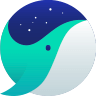
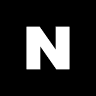
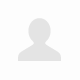
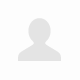

In [82]:
# 전역변수들을 확인하는 함수
globals()

In [83]:
# 딕셔너리구나~~
# 새로운 key를 어케 적지? 대괄호로 묶고, equals = 해주면 됨!
# key 값은 언제나 묶어준다.

In [87]:
df_list2 = []
# for table in tables:
for i in range(len(tables)):
    print(i)
    # 컬럼 이름을 추출
    # thead = table.find('thead')
    thead = tables[i].find('thead')
    cols = thead.get_text().split()

    # 데이터들을 2차원 리스트로 추출

    # tbody = table.find('tbody')
    tbody = tables[i].find('tbody')
    tr_list = tbody.find_all('tr')
    values = []
    for tr in tr_list:
        # 종목명을 추출
        data_list = [tr.find('th').get_text()]
        # 현재가, 전일 대비, 등락률 3개의 데이터를 추출하여 data_list 추가
        td_list = tr.find_all('td')
        for td in td_list:
            data_list.append(td.get_text().strip())
        values.append(data_list)
    globals()[f"df_{i}"] = pd.DataFrame(values, columns= cols)
    df_list2.append(for_df)

0
1
2
3


In [89]:
df_0

,종목명,현재가,전일대비,등락률
0,유진스팩10호,"2,230",상승 230,+11.50%
1,KODEX 200선물인버스2X,"2,235",상승 20,+0.90%
2,유안타제15호스팩,"2,015",상승 15,+0.75%
3,카나리아바이오,994,상승 78,+8.52%
4,세종메디칼,555,상승 68,+13.96%
5,아센디오,"1,205",상승 5,+0.42%
6,우리기술투자,"9,880","상승 1,020",+11.51%
7,아미노로직스,"1,645",상승 194,+13.37%
8,폴라리스오피스,"7,940","상승 1,420",+21.78%
9,KODEX 코스닥150선물인버스,"3,530",하락 30,-0.84%


In [88]:
df_1

,종목명,현재가,전일대비,등락률
0,에스피소프트,"14,610","상한가 3,370",+29.98%
1,컴퍼니케이,"9,430","상한가 2,170",+29.89%
2,스톤브릿지벤처스,"5,740","상한가 1,320",+29.86%
3,폴라리스오피스,"7,940","상승 1,420",+21.78%
4,레이저옵텍,"13,040","상승 2,020",+18.33%
5,리튬포어스,"6,630","상승 1,000",+17.76%
6,코셈,"30,200","상승 4,300",+16.60%
7,GS글로벌,"2,925",상승 395,+15.61%
8,한스바이오메드,"14,380","상승 1,940",+15.59%
9,에이엔피,"1,193",상승 151,+14.49%


In [90]:
df_2

,종목명,현재가,전일대비,등락률
0,윈팩,"1,181",하한가 506,-29.99%
1,PN풍년,"5,790","하한가 2,470",-29.90%
2,투비소프트,289,하한가 123,-29.85%
3,압타바이오,"5,290","하락 1,600",-23.22%
4,바이오다인,"11,890","하락 2,090",-14.95%
5,오토앤,"6,920","하락 1,200",-14.78%
6,골드앤에스,590,하락 95,-13.87%
7,플레이디,"7,760","하락 1,050",-11.92%
8,한진칼,"63,200","하락 7,700",-10.86%
9,씨씨에스,"3,755",하락 450,-10.70%


In [ ]:
df_list2 = []
for i in range(len(tables)):
    print(i)
    thead = tables[i].find('thead')
    cols = thead.get_text().split()

    tbody = tables[i].find('tbody')
    tr_list = tbody.find_all('tr')
    values = []
    for tr in tr_list:
        data_list = [tr.find('th').get_text()]
        td_list = tr.find_all('td')
        for td in td_list:
            data_list.append(td.get_text().strip())
        values.append(data_list)
    globals()[f"df_{i}"] = pd.DataFrame(values, columns= cols)
    df_list2.append(for_df)

In [98]:
!pip install lxml

  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/02/59/e1fbe2514d8ab39977b72e77f98d0fa49772f61e938049baf151b307a4f0/lxml-5.1.0-cp312-cp312-win_amd64.whl.metadata
   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.9 MB 435.7 kB/s eta 0:00:09
   -- ------------------------------------- 0.2/3.9 MB 2.0 MB/s eta 0:00:02
   --------- ------------------------------ 1.0/3.9 MB 6.0 MB/s eta 0:00:01
   --------------------- ------------------ 2.1/3.9 MB 10.1 MB/s eta 0:00:01
   ------------------------------------- -- 3.7/3.9 MB 14.8 MB/s eta 0:00:01
   ---------------------------------------- 3.9/3.9 MB 13.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [99]:
## 더 짧게 하는 방법!
for i in range(len(tables)):
    table_text = str(tables[i])
    globals()[f"df__{i}"] = pd.read_html(table_text)[0]

C:\Users\EZEN\AppData\Local\Temp\ipykernel_14020\139217159.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  globals()[f"df__{i}"] = pd.read_html(table_text)[0]
C:\Users\EZEN\AppData\Local\Temp\ipykernel_14020\139217159.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  globals()[f"df__{i}"] = pd.read_html(table_text)[0]
C:\Users\EZEN\AppData\Local\Temp\ipykernel_14020\139217159.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  globals()[f"df__{i}"] = pd.read_html(table_text)[0]
C:\Users\EZEN\AppData\Local\Temp\ipykernel_14020\139217159.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and wi

In [100]:
df__0

,종목명,현재가,전일대비,등락률
0,유진스팩10호,2230,상승 230,+11.50%
1,KODEX 200선물인버스2X,2235,상승 20,+0.90%
2,유안타제15호스팩,2015,상승 15,+0.75%
3,카나리아바이오,994,상승 78,+8.52%
4,세종메디칼,555,상승 68,+13.96%
5,아센디오,1205,상승 5,+0.42%
6,우리기술투자,9880,"상승 1,020",+11.51%
7,아미노로직스,1645,상승 194,+13.37%
8,폴라리스오피스,7940,"상승 1,420",+21.78%
9,KODEX 코스닥150선물인버스,3530,하락 30,-0.84%


In [101]:
df__1

,종목명,현재가,전일대비,등락률
0,에스피소프트,14610,"상한가 3,370",+29.98%
1,컴퍼니케이,9430,"상한가 2,170",+29.89%
2,스톤브릿지벤처스,5740,"상한가 1,320",+29.86%
3,폴라리스오피스,7940,"상승 1,420",+21.78%
4,레이저옵텍,13040,"상승 2,020",+18.33%
5,리튬포어스,6630,"상승 1,000",+17.76%
6,코셈,30200,"상승 4,300",+16.60%
7,GS글로벌,2925,상승 395,+15.61%
8,한스바이오메드,14380,"상승 1,940",+15.59%
9,에이엔피,1193,상승 151,+14.49%


In [102]:
soup_text = str(soup2)

In [103]:
# read_html() : html 문서로 이루어진 문자 타입의 데이터에서
# table 태그만 추출하여 데이터프레임들을 리스트로 출력

dfs = pd.read_html(soup_text)

C:\Users\EZEN\AppData\Local\Temp\ipykernel_14020\482335558.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(soup_text)


In [109]:
dfs[3] #모든 표로 돼있는 정보들을 가져올 수 있음.

,종목명,현재가,전일대비,등락률
0,삼성전자,73400,상승 200,+0.27%
1,SK하이닉스,156200,"하락 1,800",-1.14%
2,LG에너지솔루션,401500,"상승 1,000",+0.25%
3,삼성바이오로직스,774000,"하락 27,000",-3.37%
4,현대차,250500,"상승 2,500",+1.01%
5,삼성전자우,63600,"상승 2,200",+3.58%
6,기아,124500,"상승 6,800",+5.78%
7,셀트리온,179700,"하락 10,300",-5.42%
8,POSCO홀딩스,431500,"하락 6,000",-1.37%
9,LG화학,453000,"하락 11,500",-2.48%


In [110]:
len(dfs)

12